In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

In [4]:
bad_ids = pd.read_csv('./data/bad_ids.csv')['id_card'].values

df = pd.read_csv('./data/09_groups.csv')
df = df[~df['id_card'].isin(bad_ids)]

df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [6]:
is_green_cnt = df.groupby("id_doc")['is_green'].sum()
green_cnt = list(is_green_cnt.index[is_green_cnt.to_numpy().nonzero()])
non_green_cnt = list(set(is_green_cnt.index).difference(green_cnt))
ttest_ind(is_green_cnt[green_cnt], is_green_cnt[non_green_cnt])

Ttest_indResult(statistic=2511.536116022659, pvalue=0.0)

H0 is rejected. It means that there is some dependancy between discounted products and average order sum.

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

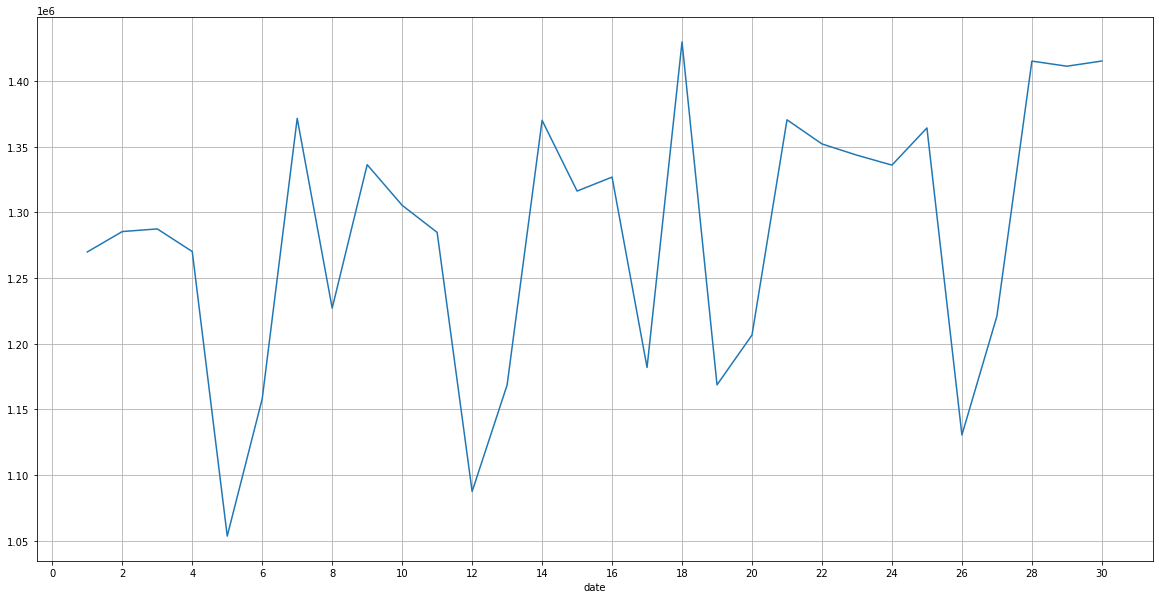

In [8]:
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')
day_cnts = df.groupby(by=[df.index.day])['id_doc'].count()
plt.figure(figsize=(20,10))
plt.locator_params(axis="x", nbins=31)
day_cnts.plot()
plt.grid()

After 5-6th days, and after 19-20th days, which are likely to be local minimas, the shopping frequency grows.

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount - The customers grouped by the total numer of orders 
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

### Frequent buyers

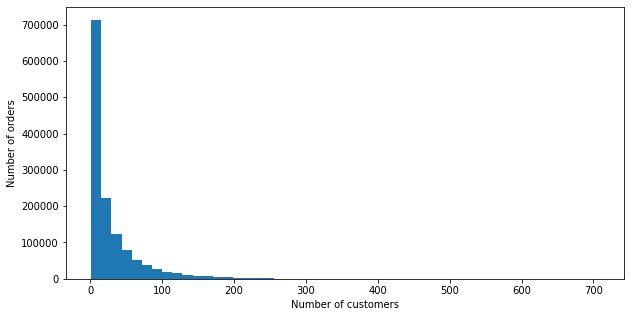

In [30]:
grouped_df = df.groupby('id_card')['id_doc'].count()

plt.figure(figsize=(10, 5))
plt.hist(grouped_df, bins=50)
plt.xlabel('Number of customers')
plt.ylabel('Number of orders');

### Average purchase sum

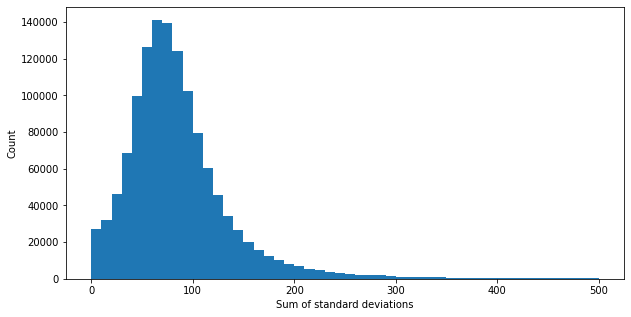

In [34]:
grouped_df = df.groupby('id_card')['sum'].std()
grouped_df = grouped_df[grouped_df < 500]

plt.figure(figsize=(10, 5))
plt.xlabel('Sum of standard deviations')
plt.ylabel('Count')
plt.hist(grouped_df, bins=50);

### Usual cart

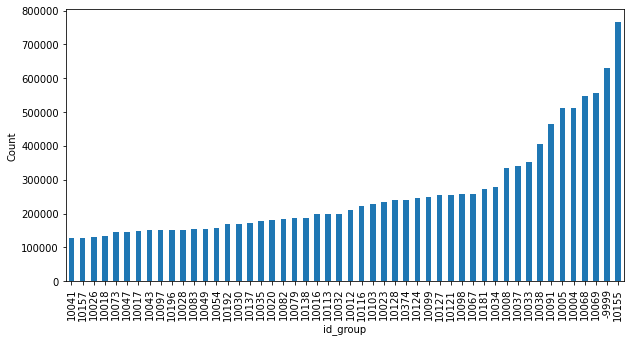

In [33]:
grouped_df = df.groupby('id_group')['id_card'].unique().apply(len).sort_values()[-50:]
plt.figure(figsize=(10, 5))
grouped_df.plot(kind='bar')
plt.ylabel('Count');